# In this notebook, we visualize the dataset.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv('data/data_by_hour.csv')
df

,time,AppleStandHour,SleepAnalysis,ActiveEnergyBurned,AppleStandTime,BasalEnergyBurned,DistanceWalkingRunning,EnvironmentalAudioExposure,HeartRate,HeartRateVariabilitySDNN,OxygenSaturation,PhysicalEffort,RespiratoryRate,StepCount,SleepDuration
0,2022-08-04 00:00:00+02:00,NaN,NaN,NaN,NaN,NaN,0.072130,NaN,NaN,NaN,NaN,NaN,NaN,114.0,NaN
1,2022-08-04 02:00:00+02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-08-04 03:00:00+02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-08-04 04:00:00+02:00,NaN,NaN,NaN,NaN,NaN,0.010230,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN
4,2022-08-04 05:00:00+02:00,NaN,NaN,NaN,NaN,NaN,0.021410,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22719,2025-05-31 12:00:00+02:00,HKCategoryValueAppleStandHourIdle,HKCategoryValueSleepAnalysisAsleepREM,1.151,NaN,77.368,NaN,40.1504,58.0,NaN,0.99,1.0,15.0,NaN,0.755556
22720,2025-05-31 13:00:00+02:00,HKCategoryValueAppleStandHourIdle,NaN,18.354,NaN,96.214,0.115445,61.2572,65.0,62.6605,NaN,1.1,NaN,156.0,NaN
22721,2025-05-31 14:00:00+02:00,HKCategoryValueAppleStandHourIdle,NaN,21.603,1.0,110.043,0.207285,70.9537,72.0,NaN,NaN,1.4,NaN,258.0,NaN
22722,2025-05-31 15:00:00+02:00,HKCategoryValueAppleStandHourStood,NaN,5.673,NaN,24.657,NaN,71.5681,69.0,NaN,NaN,1.4,NaN,NaN,NaN


### Let's visualize the boxplots of every numerical column.

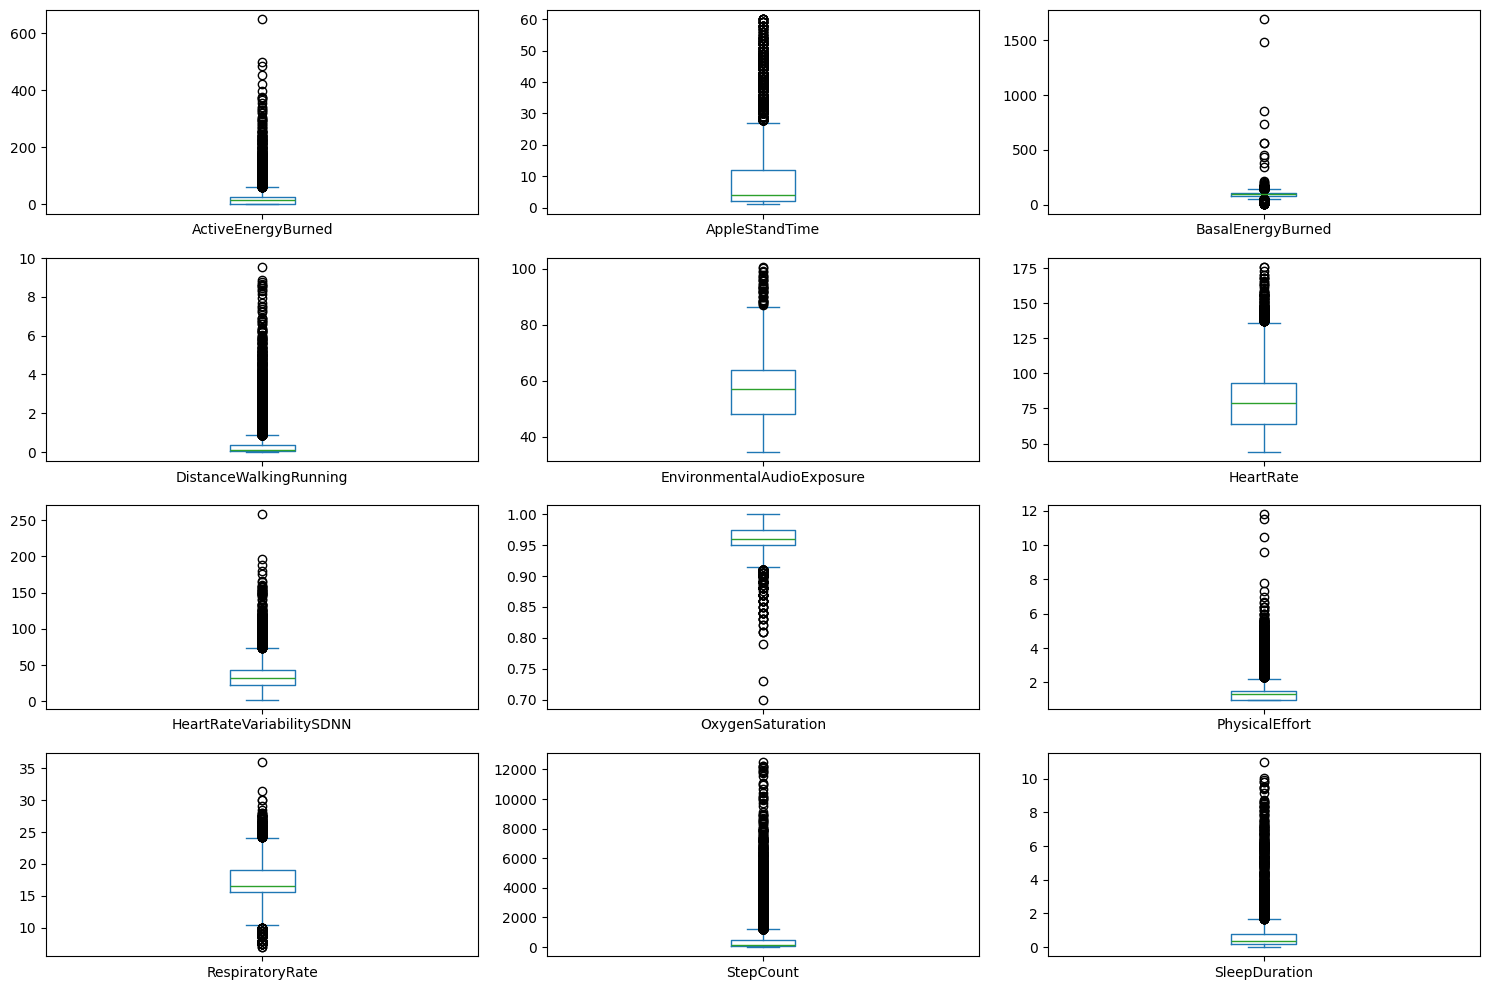

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

df.plot(kind='box', subplots=True, layout=(int(len(df.columns)**0.5)+1, -1), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


### Now, let's visualize the data trends over time.

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

def generate_plots_for_column(df, value_column, time_column='time'):
    df = df.copy()
    df[time_column] = pd.to_datetime(df[time_column])
    
    # 1. Line plot over time
    plt.figure(figsize=(14, 6))
    plt.plot(df[time_column], df[value_column], label=value_column, alpha=0.6)
    plt.xlabel('Time')
    plt.ylabel(value_column)
    plt.title(f'{value_column} Over Time')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 2. Average by hour
    df['hour'] = df[time_column].dt.hour
    hourly_avg = df.groupby('hour')[value_column].mean()

    plt.figure(figsize=(10, 5))
    hourly_avg.plot(kind='bar', color='red')
    plt.title(f'Average {value_column} by Hour of Day')
    plt.xlabel('Hour')
    plt.ylabel(f'Average {value_column}')
    plt.grid(True)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # 3. Average by weekday
    df['weekday'] = df[time_column].dt.dayofweek
    weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    df['weekday_name'] = df['weekday'].map(lambda x: weekday_names[x])
    weekly_avg = df.groupby('weekday_name')[value_column].mean().reindex(weekday_names)

    plt.figure(figsize=(10, 5))
    weekly_avg.plot(kind='bar', color='green')
    plt.title(f'Average {value_column} by Weekday')
    plt.xlabel('Weekday')
    plt.ylabel(f'Average {value_column}')
    plt.grid(True)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

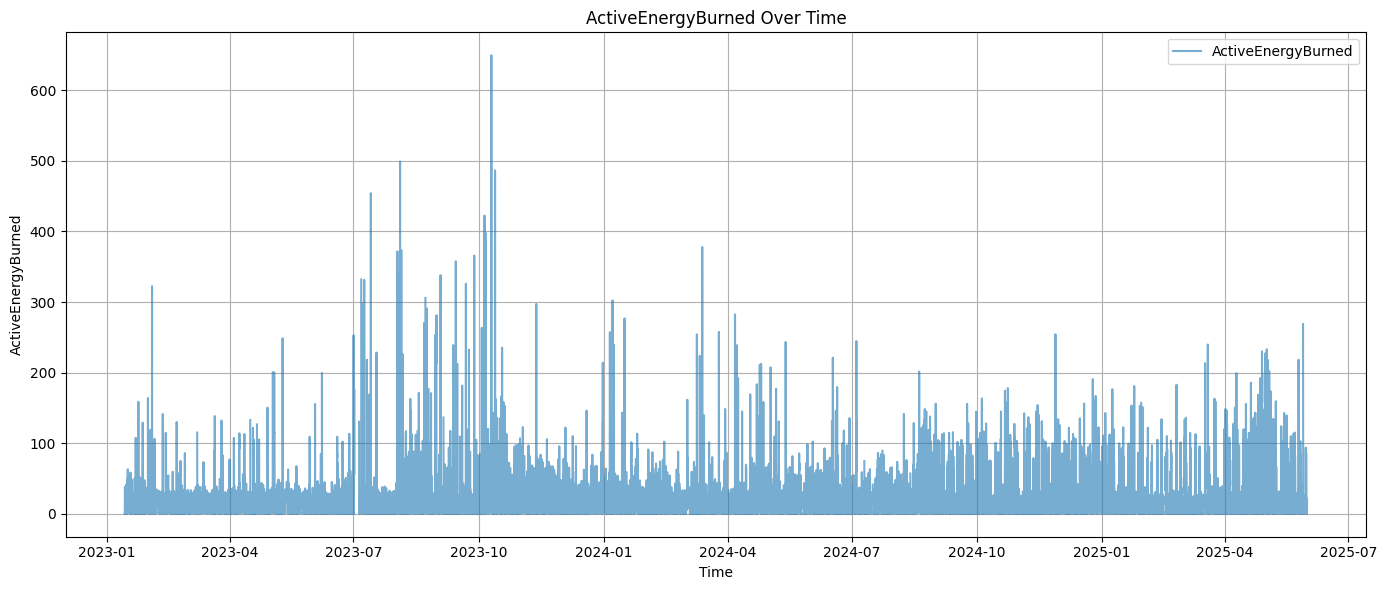

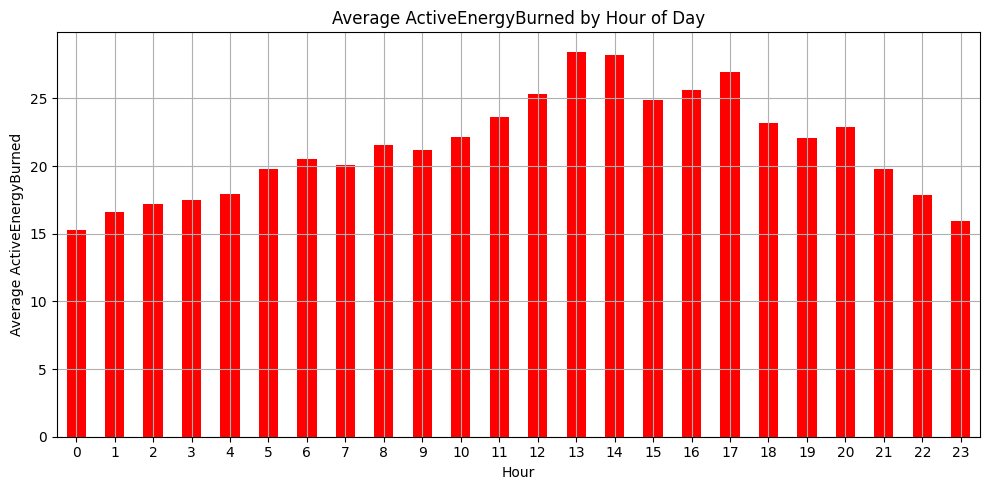

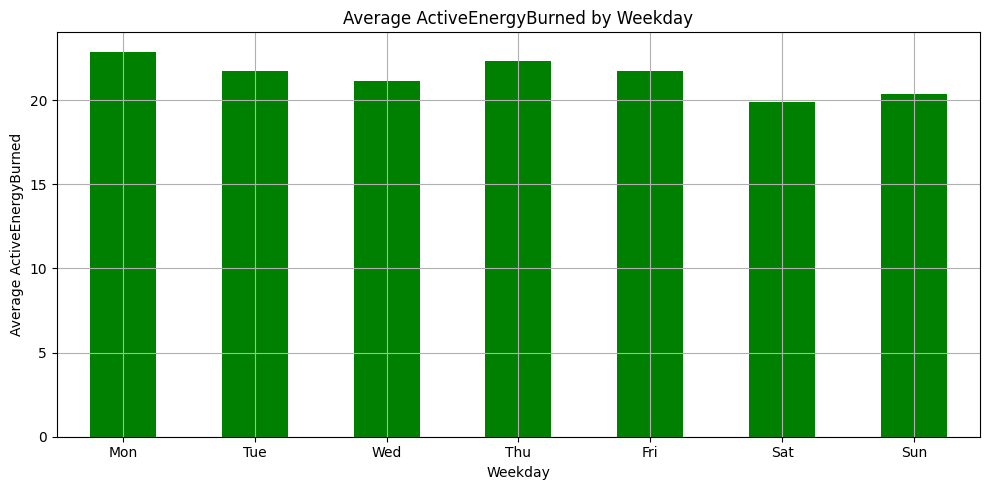

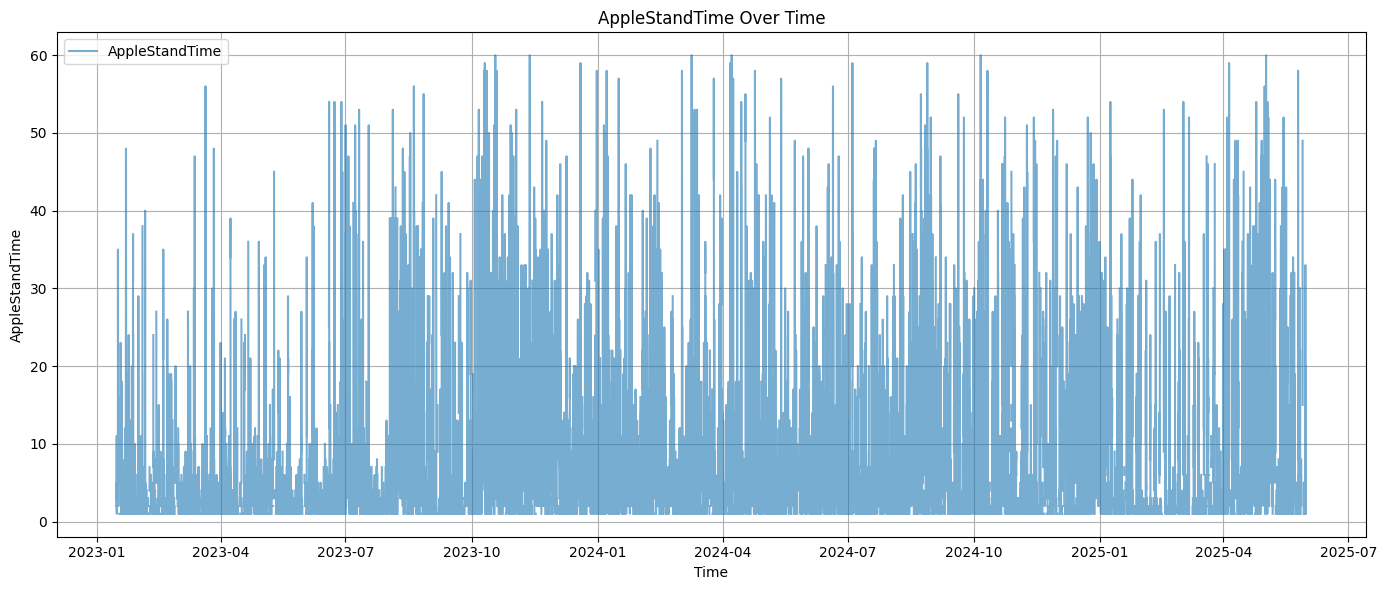

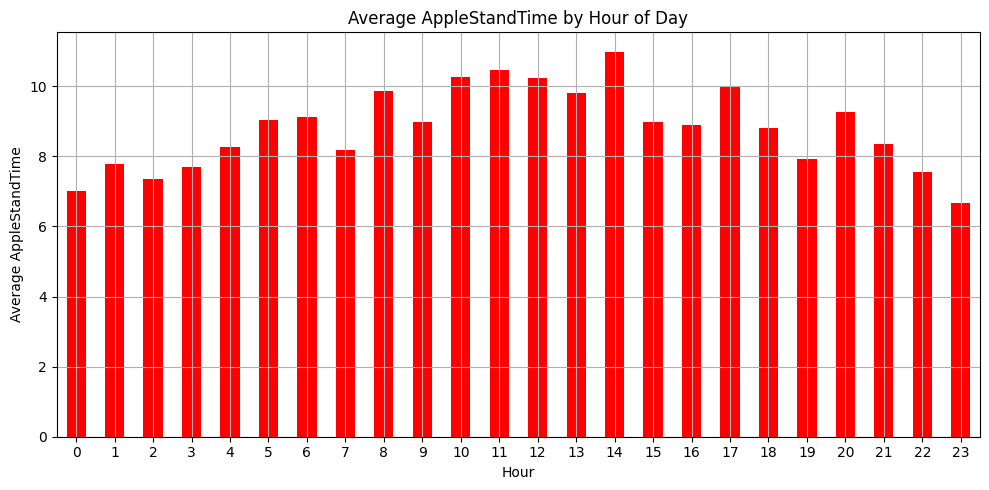

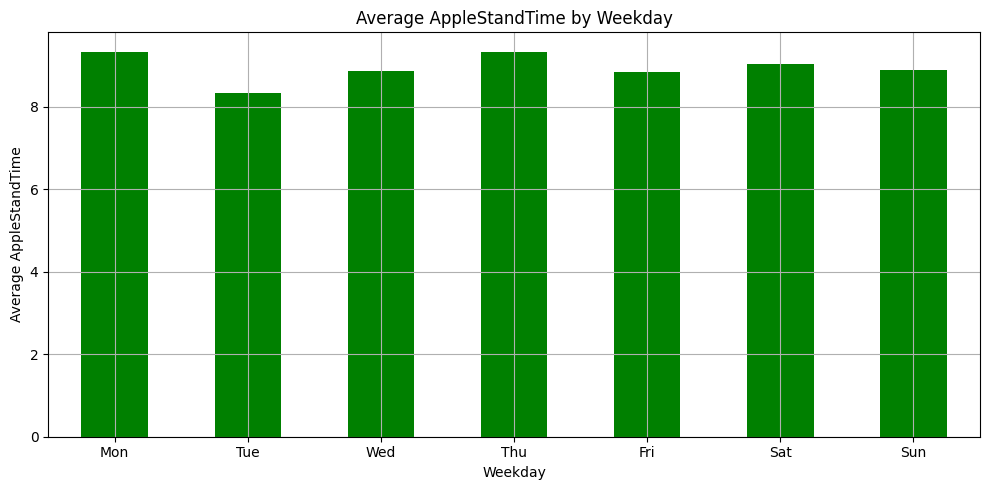

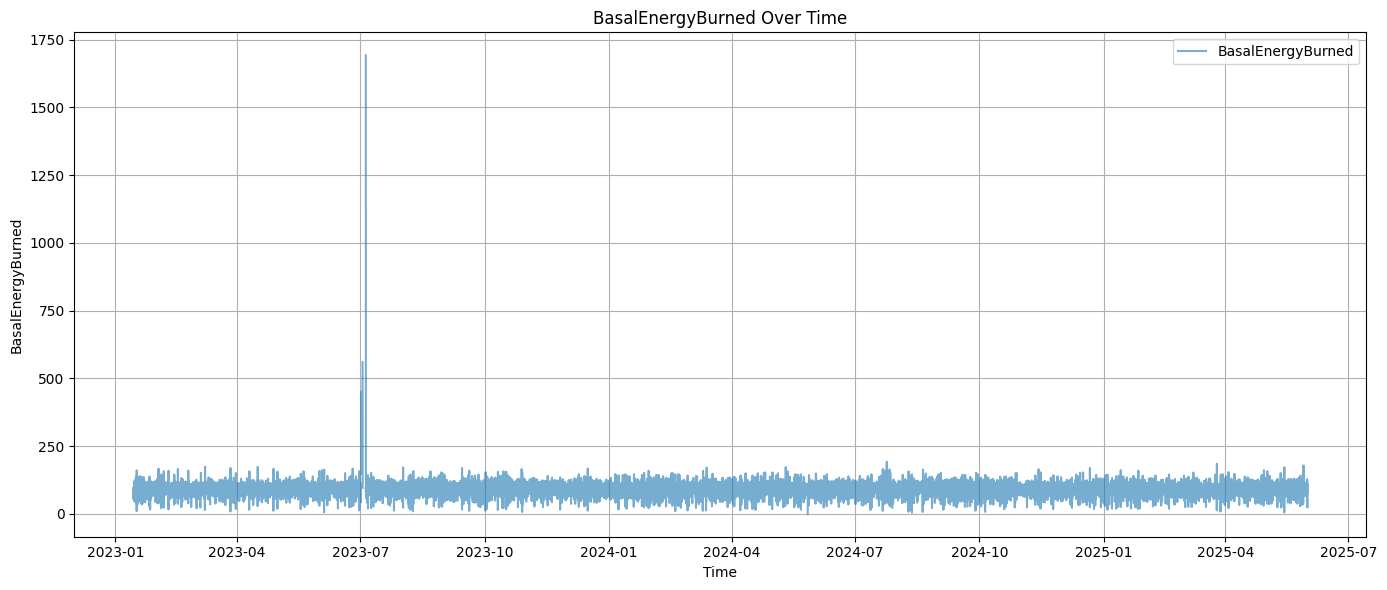

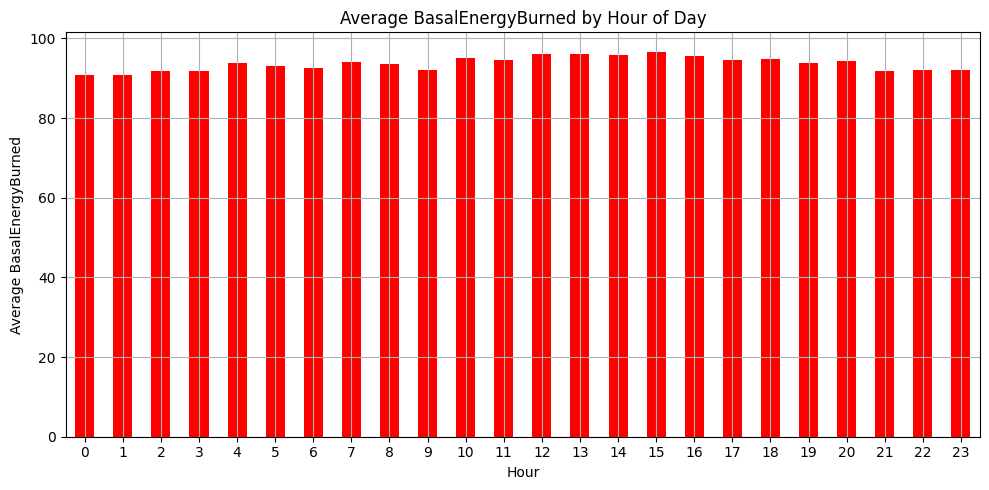

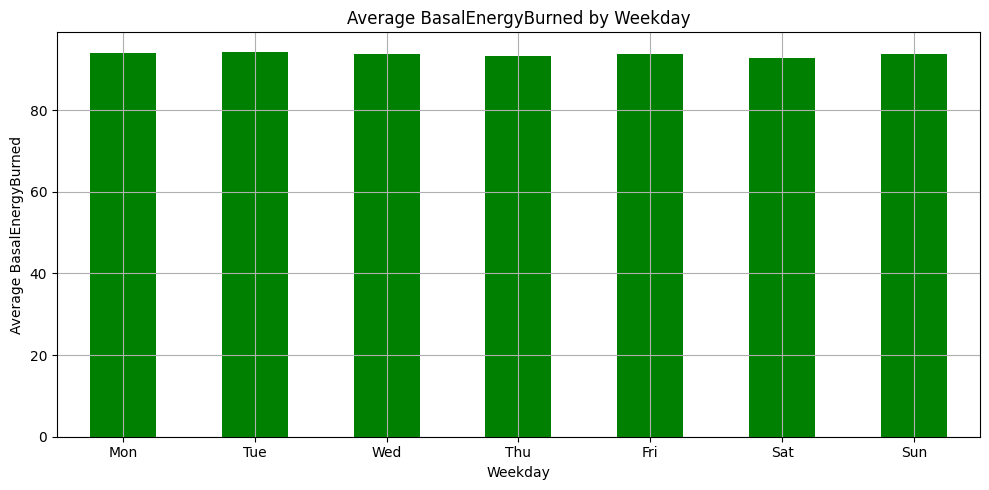

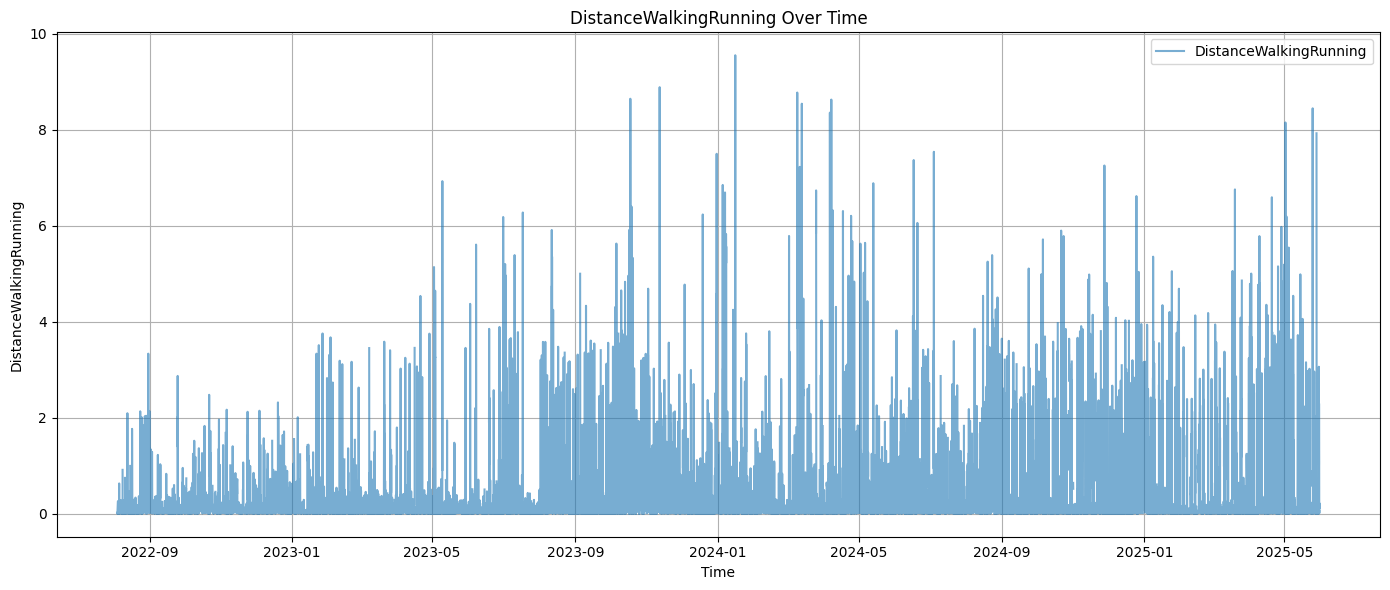

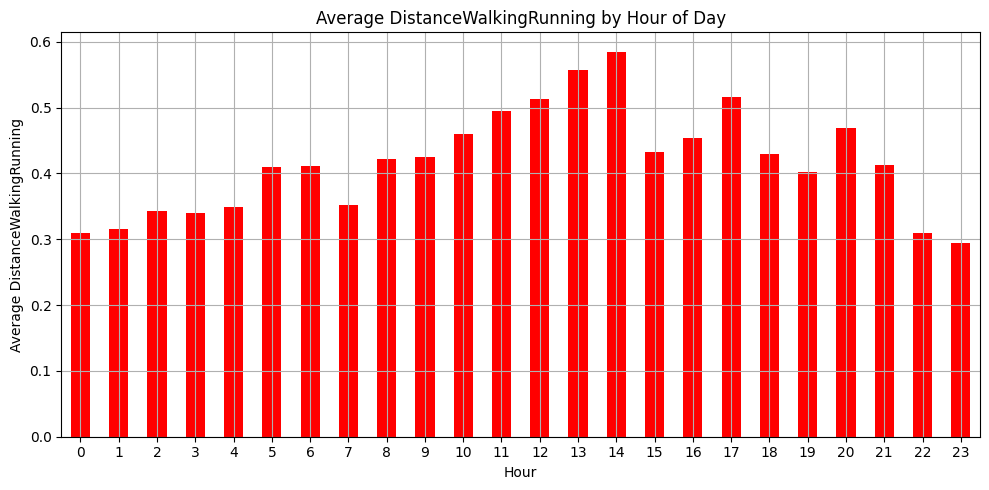

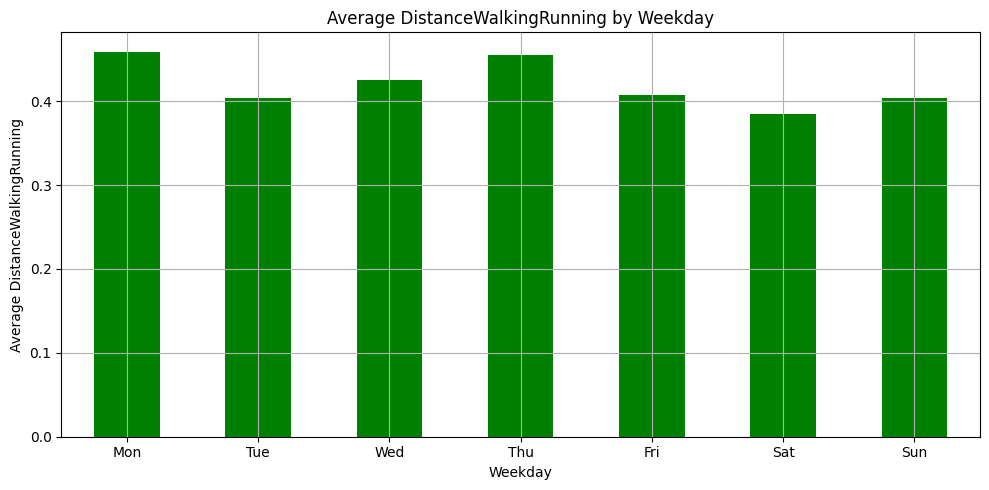

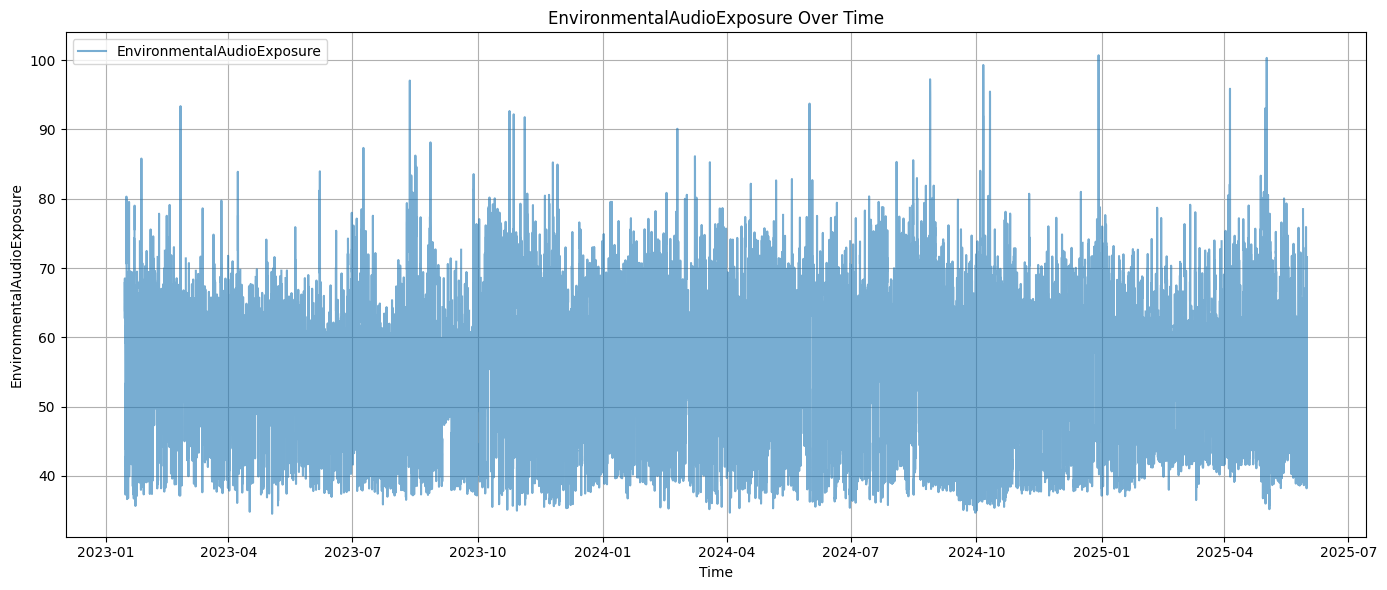

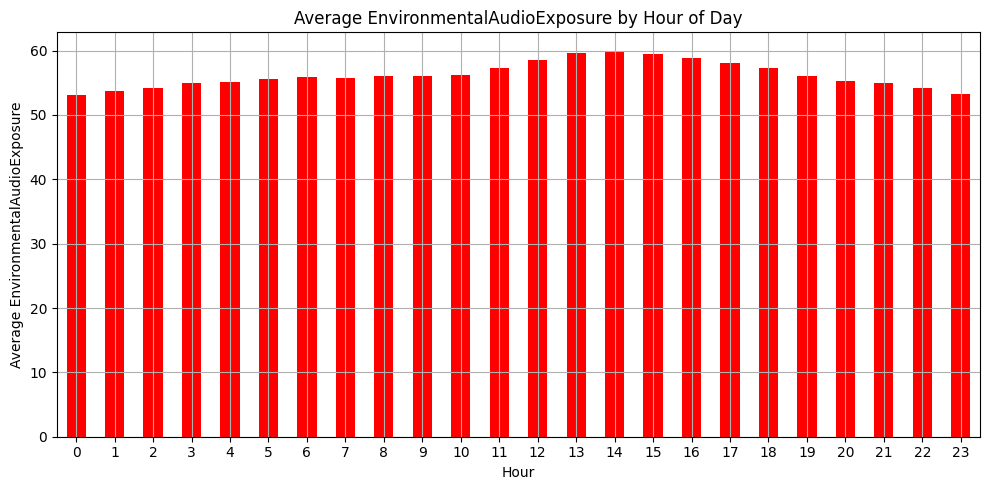

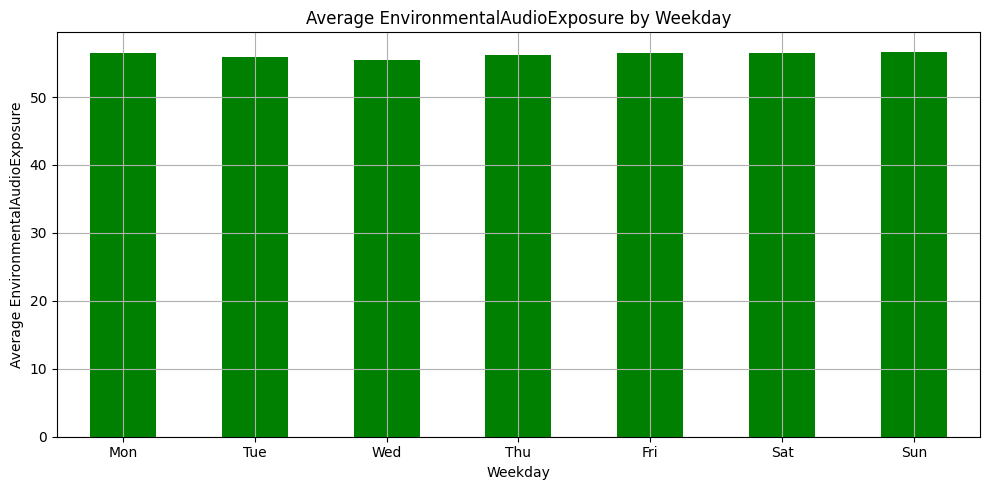

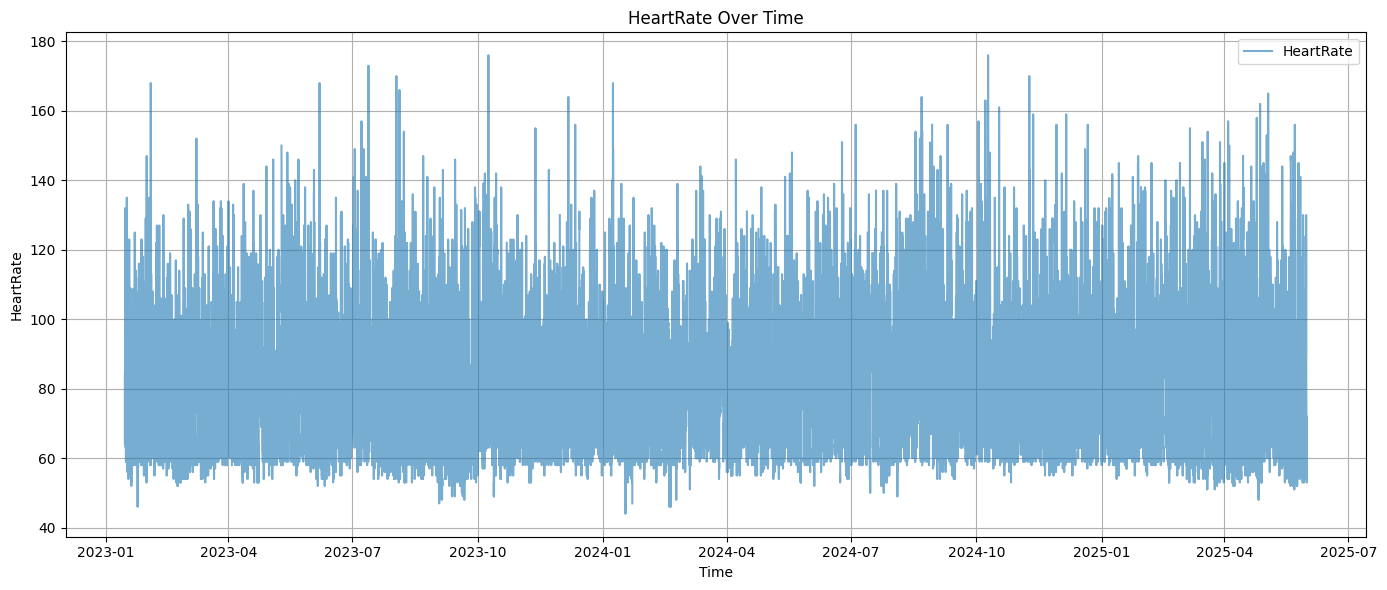

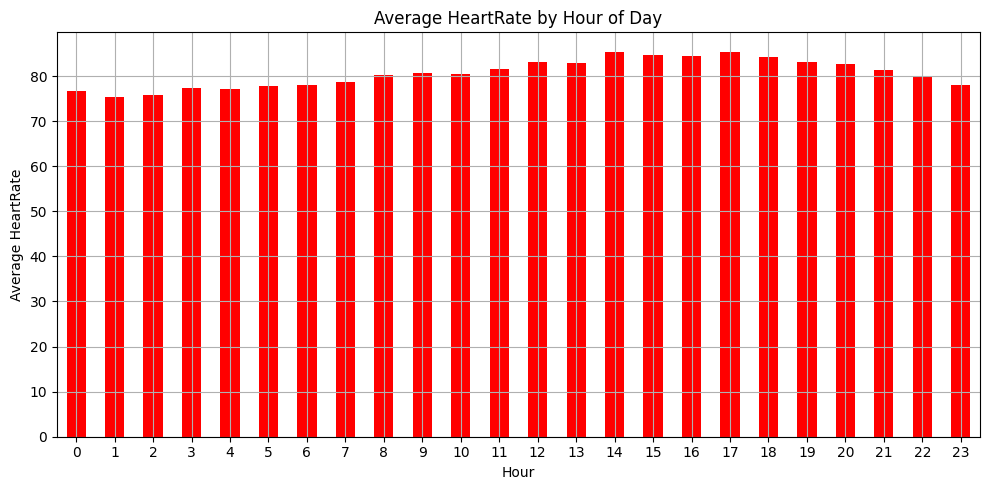

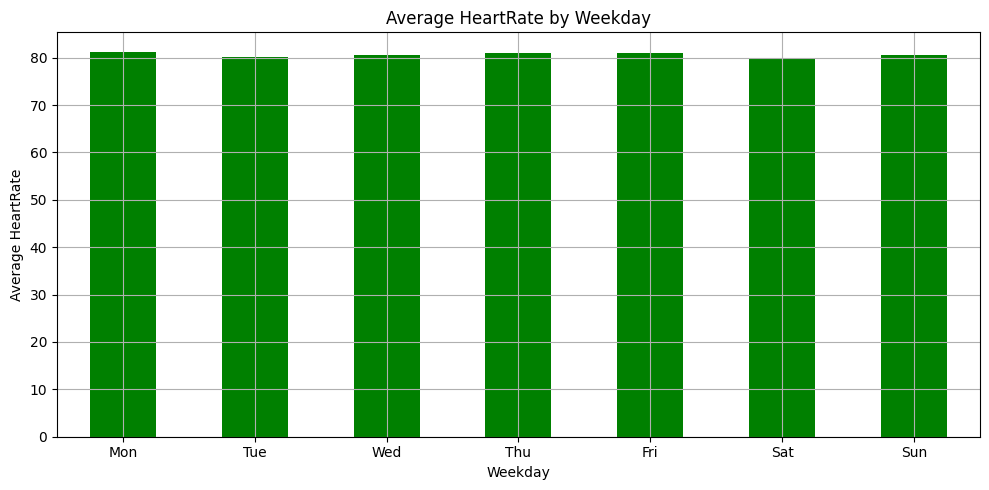

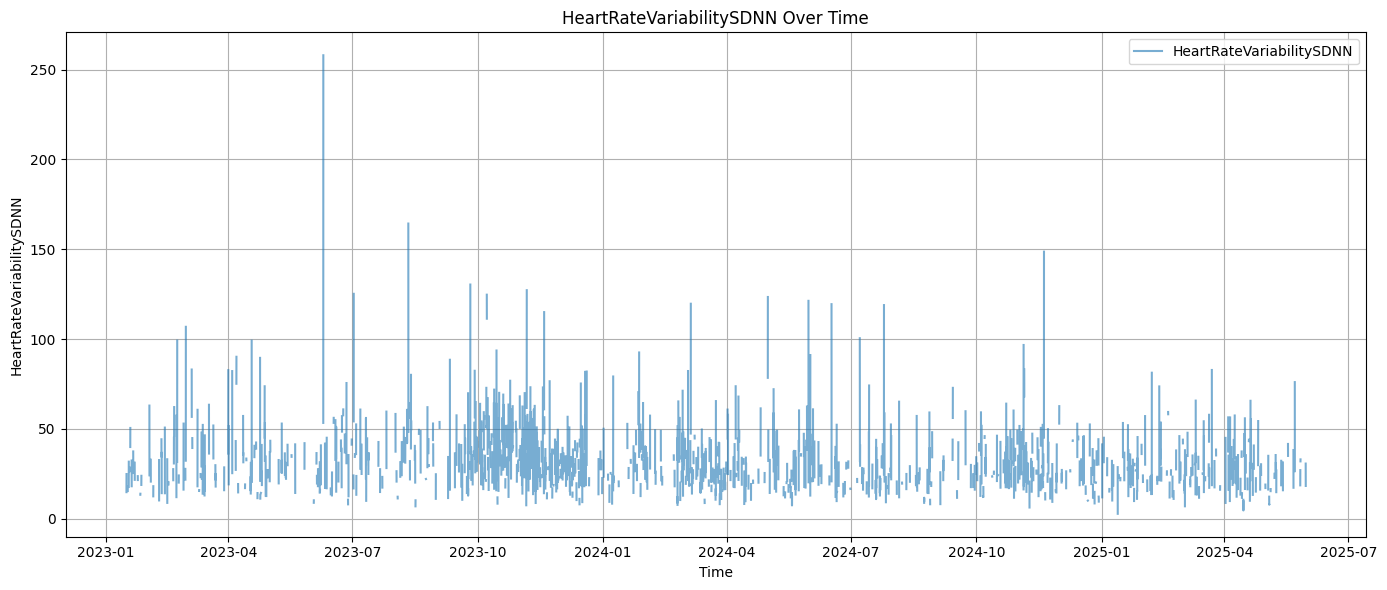

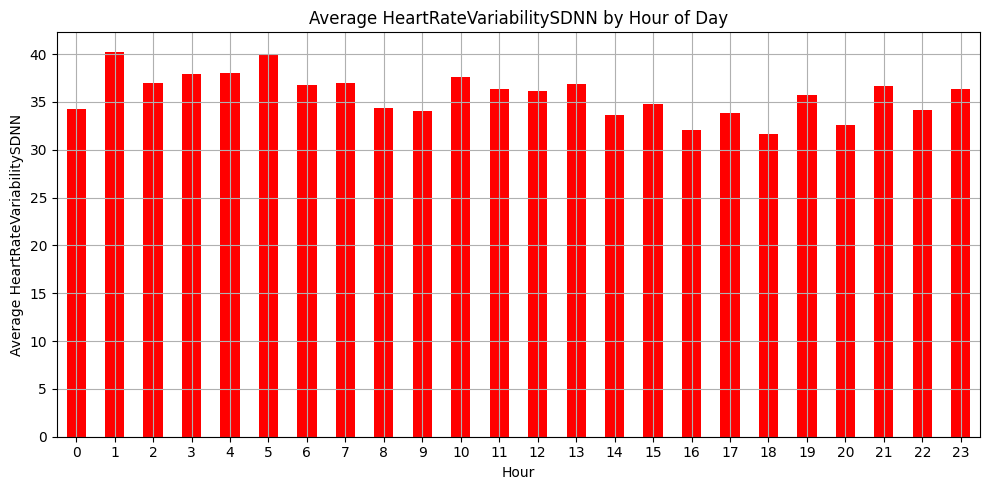

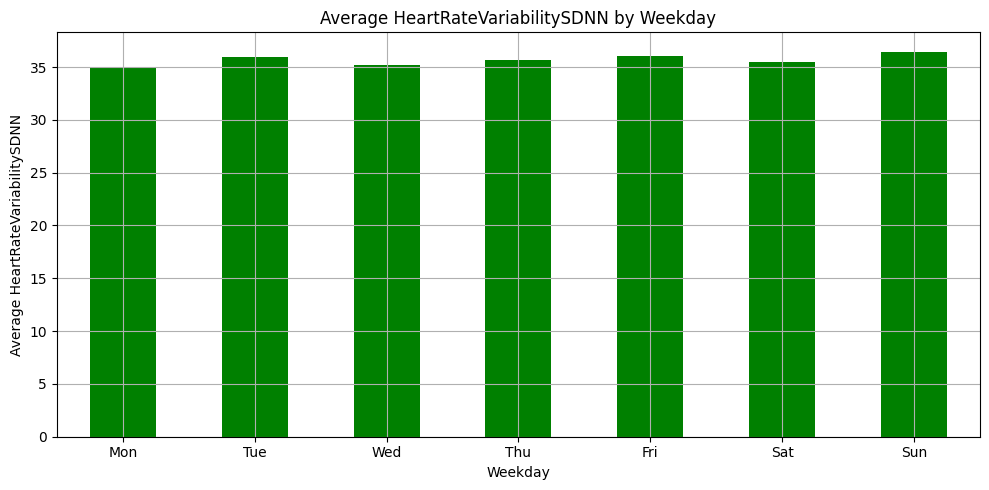

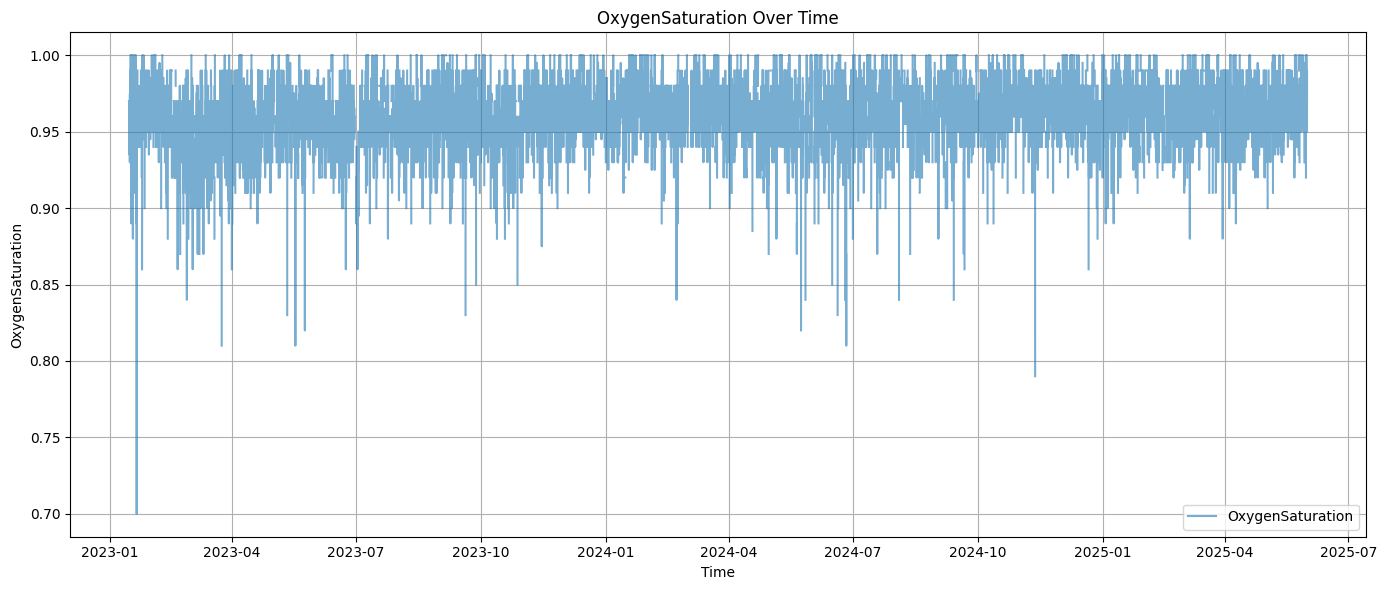

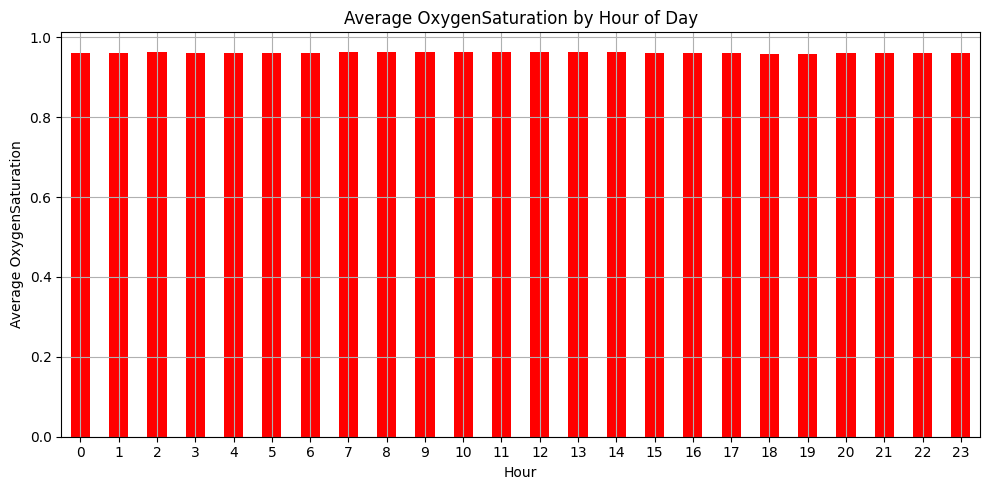

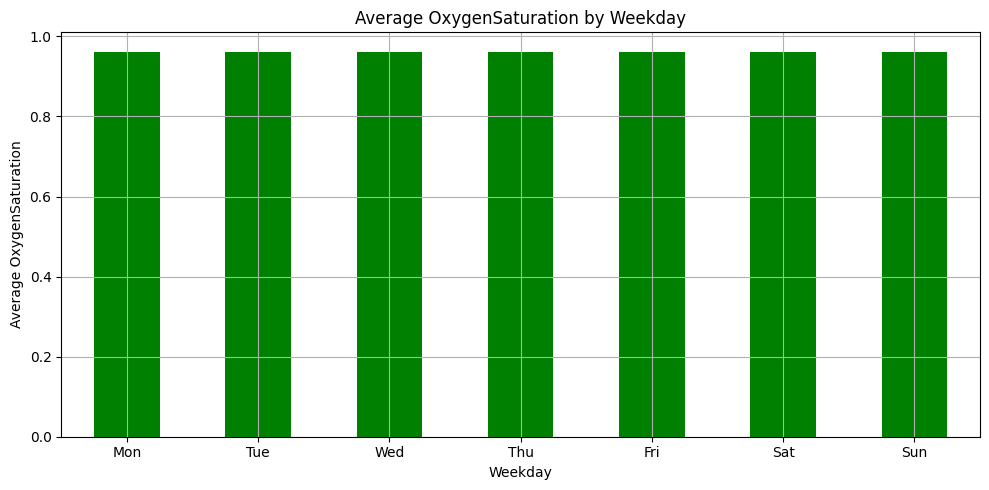

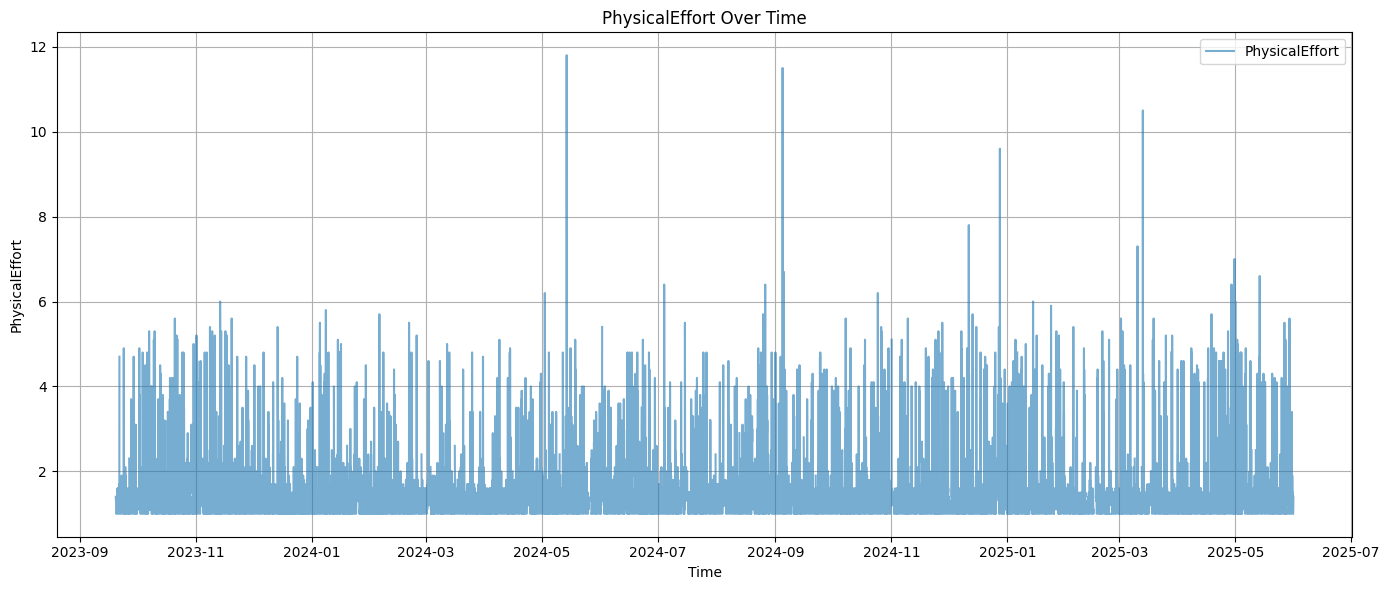

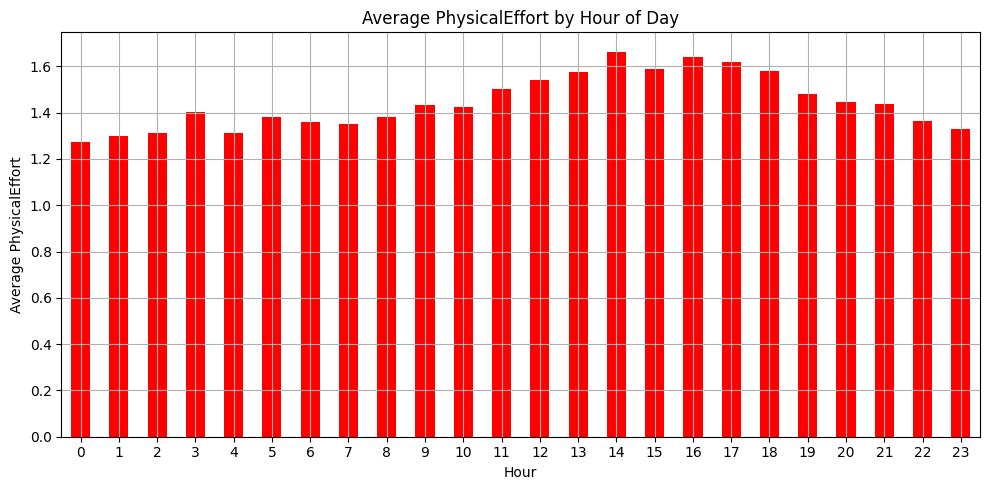

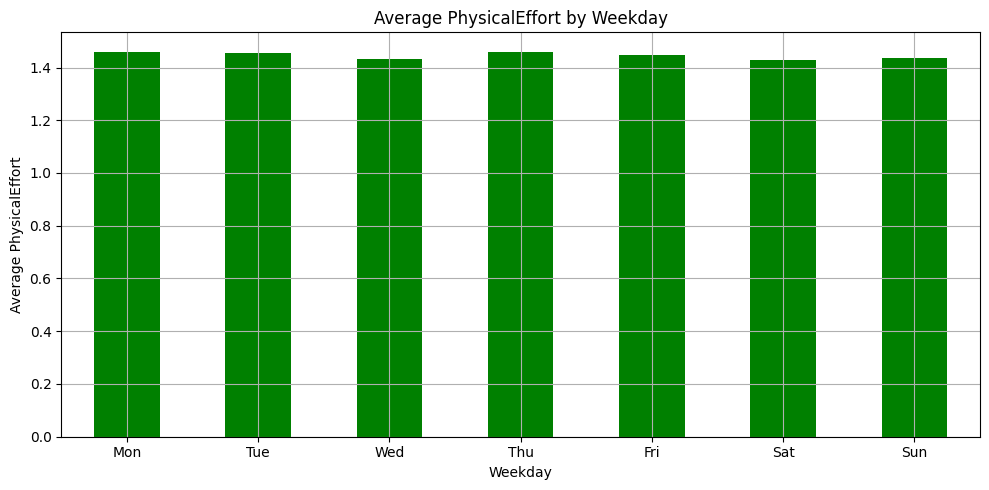

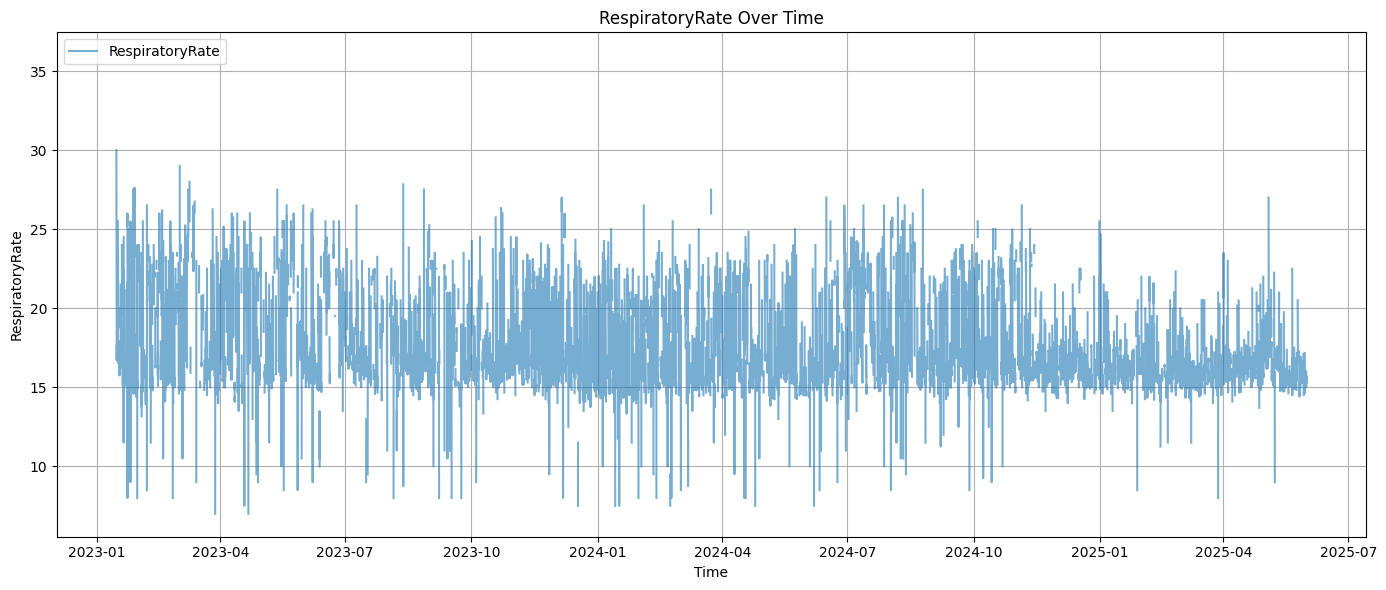

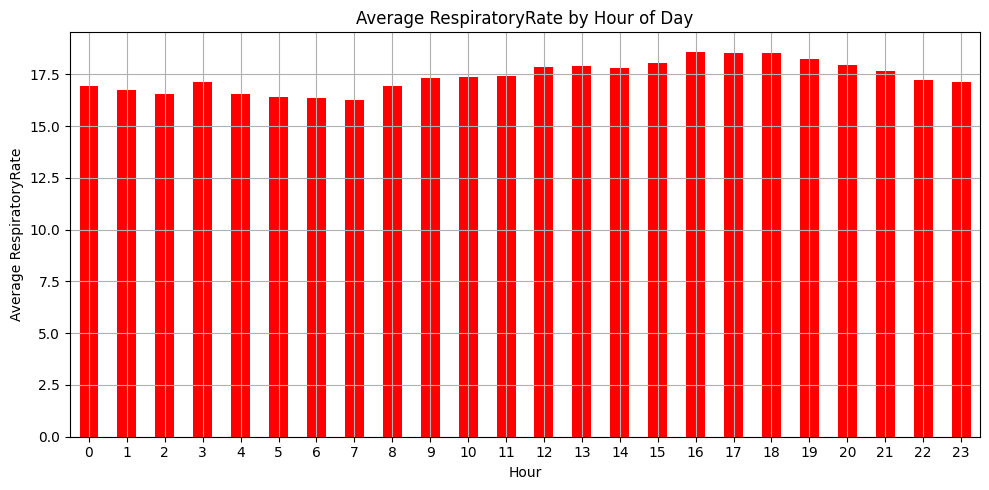

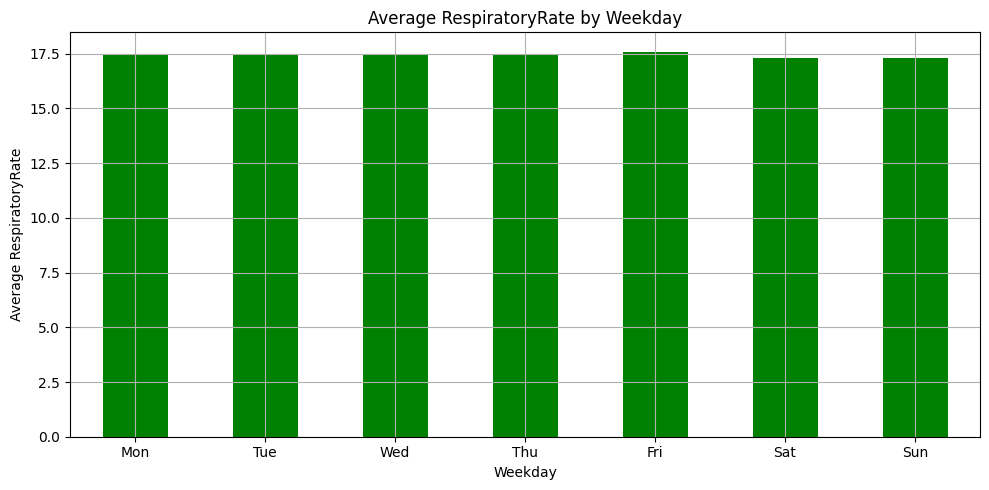

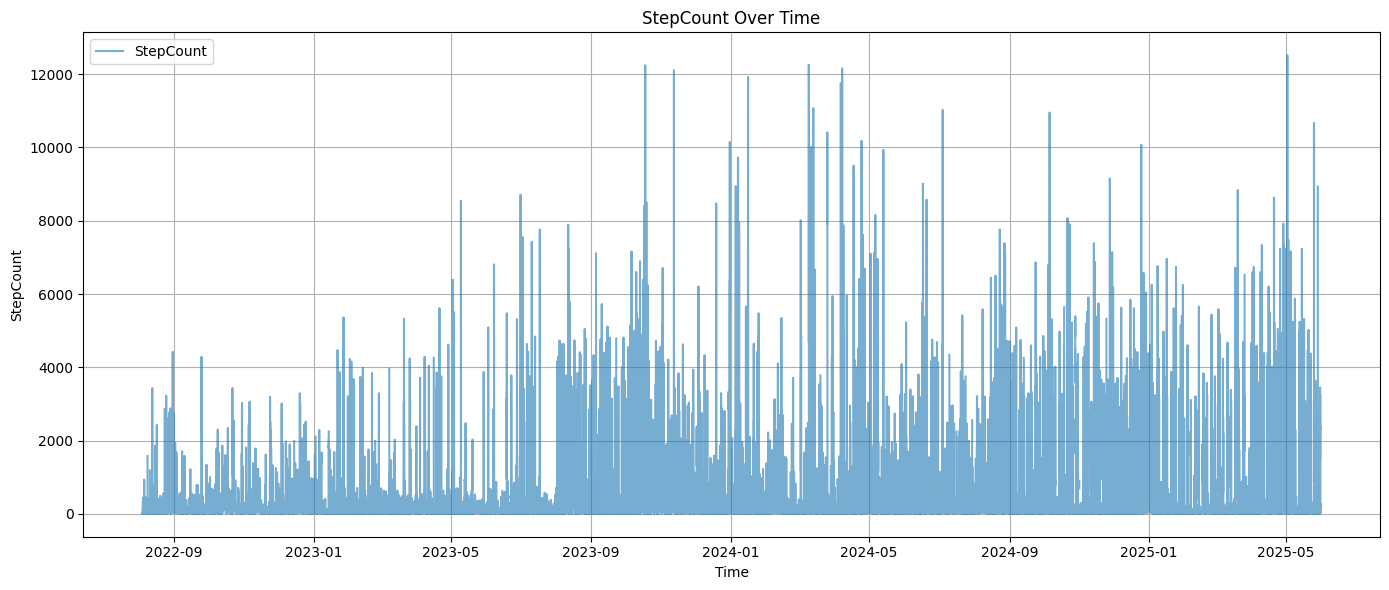

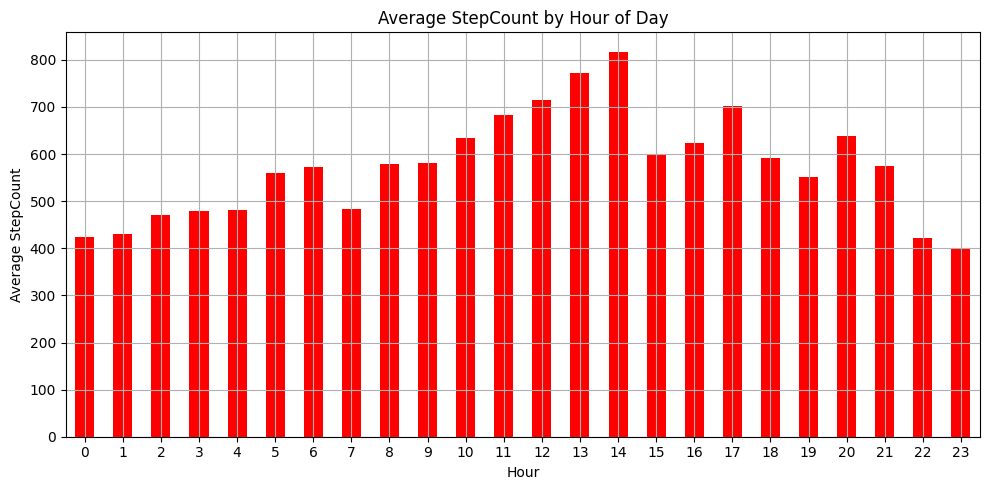

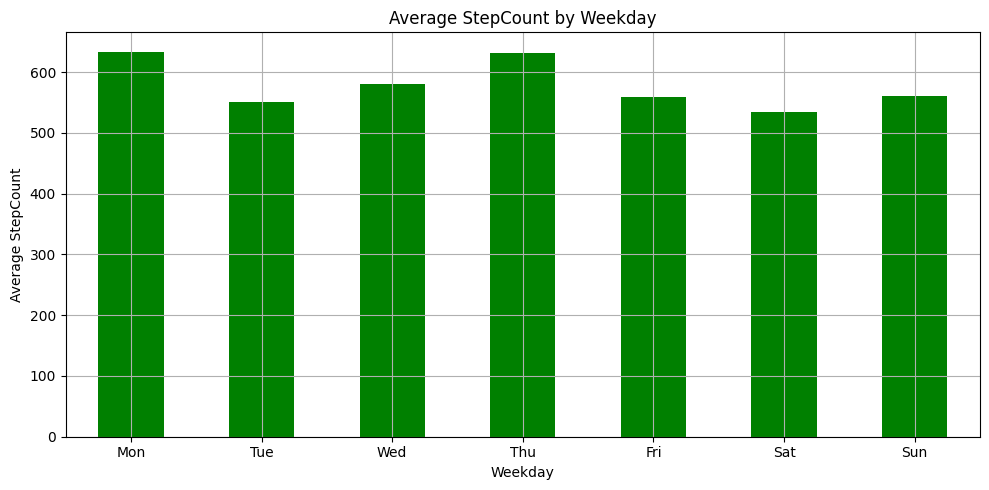

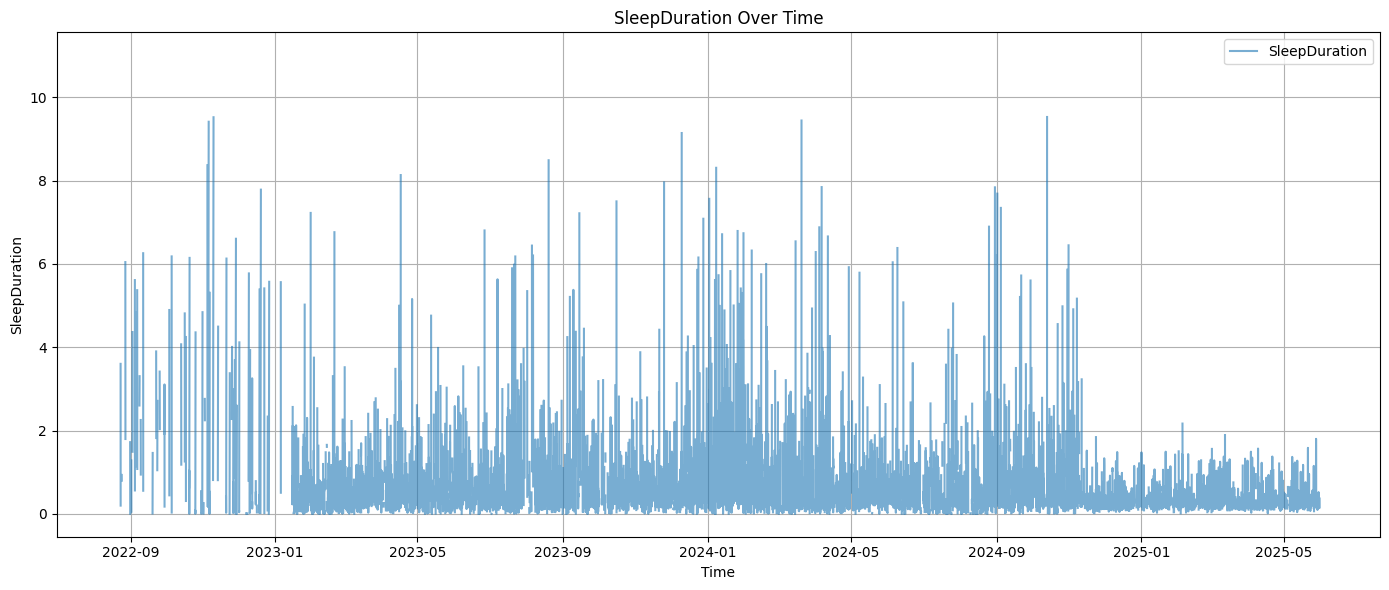

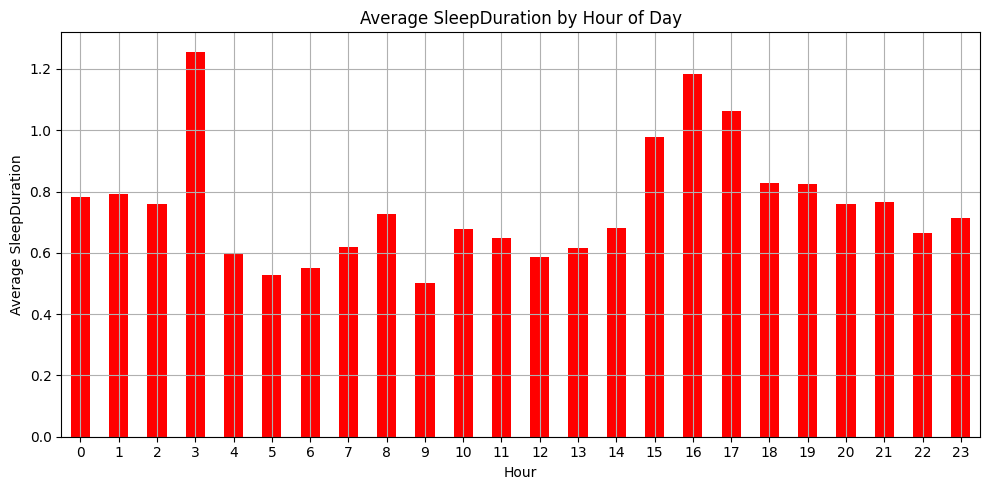

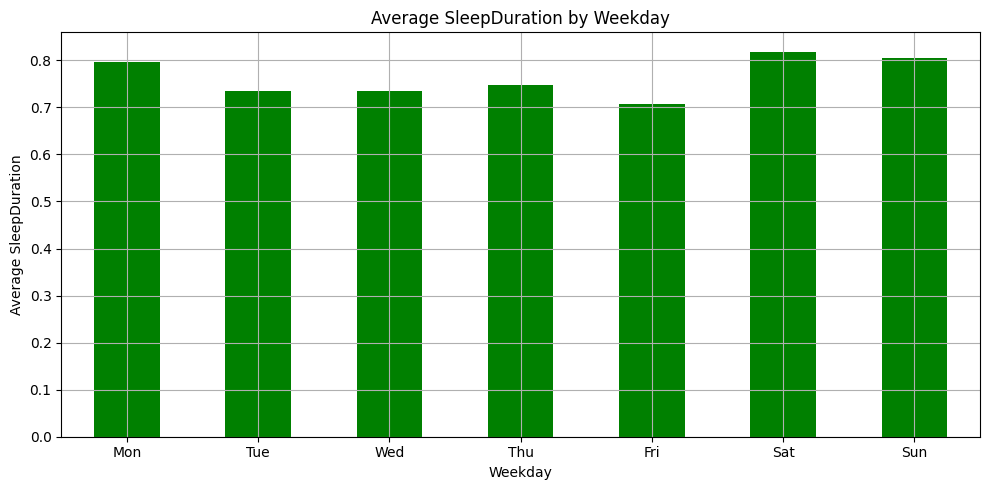

In [57]:
numeric_columns = df.select_dtypes(include='number').columns

for col in numeric_columns:
    generate_plots_for_column(df, value_column=col, time_column='time')


### Now, let's analyse the categorical features.

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_categorical_feature(df, cat_column, value_column=None, agg='mean', top_n=None):
    """
    Plots distribution or aggregation for a categorical feature.

    Parameters:
    - df: DataFrame
    - cat_column: name of the categorical column
    - value_column: name of the numeric column to aggregate (optional)
    - agg: aggregation method if value_column is provided ('mean', 'sum', 'median', etc.)
    - top_n: if specified, show only the top N most frequent categories
    """
    df = df.copy()

    # Drop NA values
    df = df[[cat_column] + ([value_column] if value_column else [])].dropna()

    # Limit to top N categories if specified
    if top_n is not None:
        top_categories = df[cat_column].value_counts().nlargest(top_n).index
        df = df[df[cat_column].isin(top_categories)]

    plt.figure(figsize=(10, 6))

    if value_column:
        # Aggregation plot (e.g., average or total per category)
        grouped = df.groupby(cat_column)[value_column].agg(agg).sort_values(ascending=False)
        sns.barplot(x=grouped.index, y=grouped.values, palette='viridis')
        plt.ylabel(f'{agg.capitalize()} {value_column}')
        plt.title(f'{agg.capitalize()} {value_column} by {cat_column}')
    else:
        # Count plot
        sns.countplot(data=df, x=cat_column, order=df[cat_column].value_counts().index, palette='Set2')
        plt.ylabel('Count')
        plt.title(f'Count of Records by {cat_column}')

    plt.xlabel(cat_column)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


/var/folders/j6/hnb1wkw115x3893s7581k7s40000gn/T/ipykernel_16851/2962329661.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=cat_column, order=df[cat_column].value_counts().index, palette='Set2')


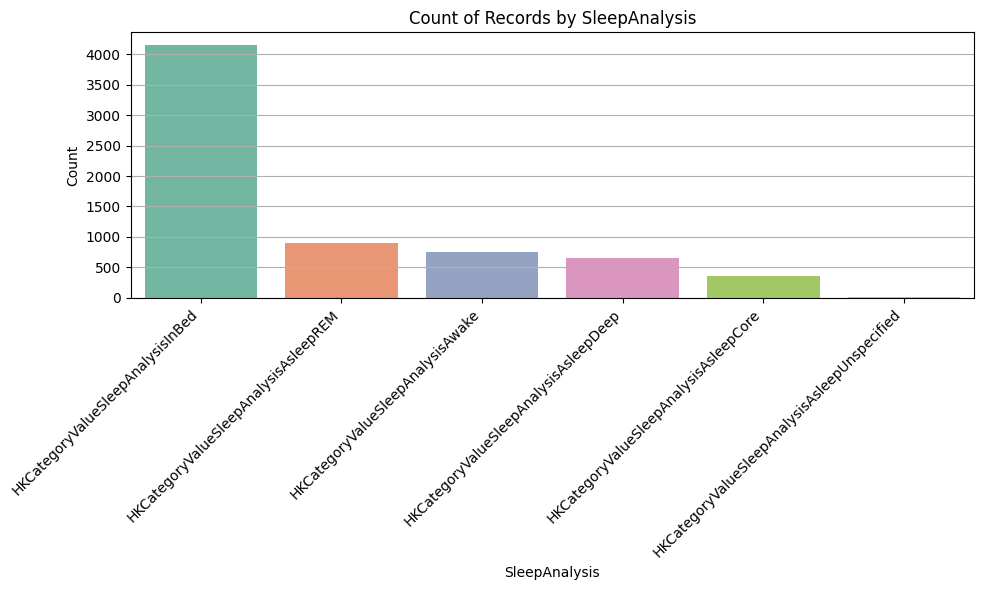

/var/folders/j6/hnb1wkw115x3893s7581k7s40000gn/T/ipykernel_16851/2962329661.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=cat_column, order=df[cat_column].value_counts().index, palette='Set2')


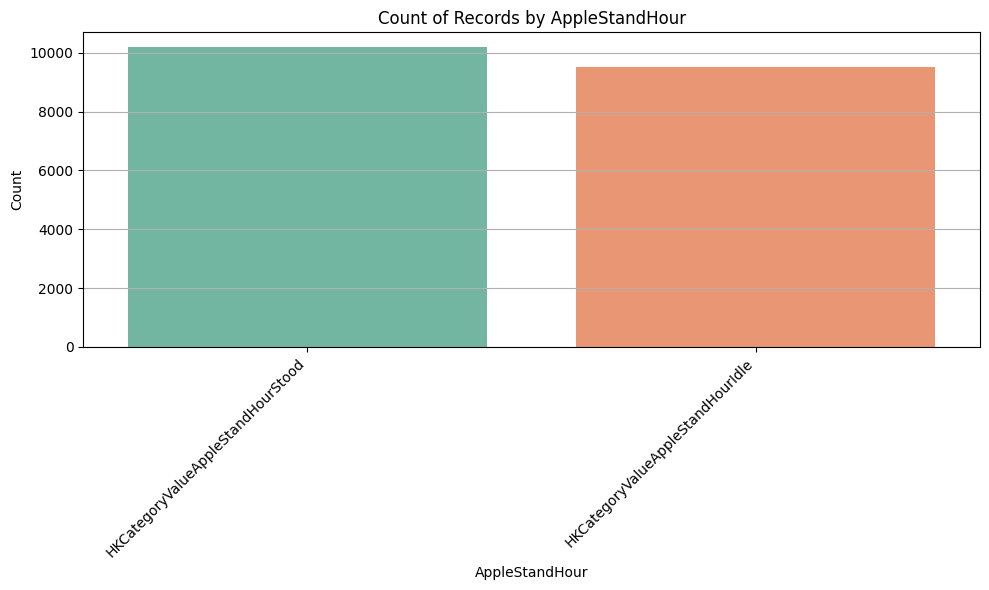

In [59]:
# Just count how many records are in each category
plot_categorical_feature(df, cat_column='SleepAnalysis')

# Show average step count per mood
plot_categorical_feature(df, cat_column='AppleStandHour')


